# Fifa World Cup (Mens) Bookings analysis

<p> In this Analysis we will be looking at all bookings made in all world cup games since the intruduction of the yellow/red card system at the 1970 World Cup in Mexico won by Brazil. </p>

In order to understand better we will look a little at the history of the World Cup and how it has evolved in terms of team participation, and the make up of referees officiating.
Firstly we will look at the number of teams participating in the tournament and the number of games played.

The hypothesis is that the number of bookings and the players and teams booked is not solely dependent on the actions on the field and can vary dependent on a number of other factors.
The composition of referees from certain contries or football confederations could be one, as could the location of the match, the teams participating, and if a 'home advantage' exists.




### Imports

In [18]:
#imports
# db file wcdbmen.db to be placed in data subdirectory and ps_helpers in same dir as notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sqlite3
conn = sqlite3.connect('data/wcdbmen.db')

import ps_helpers

%run -i ps_helpers.py

#import os
# For R lovers
#plt.matplotlib.style.use("ggplot")

### Tournament - Composition of Referees


Below you can see tha make up of referees by member confederation, and how this has changed since the thournaments inception.
The plots on the left show percentage of total make up of refereeing panel while the plots on the right show percentages of the actual number of games refereed by members of the different confederations.
Although the two are similar, the percentage of games refereed does indicate for example some under and over-representation in terms of actual number games refereed.

As Uefa is by far the largest representative of the referee confederations the second 100% stacked chart can be filtered by adding confederation codes to the python list shown in cells below.

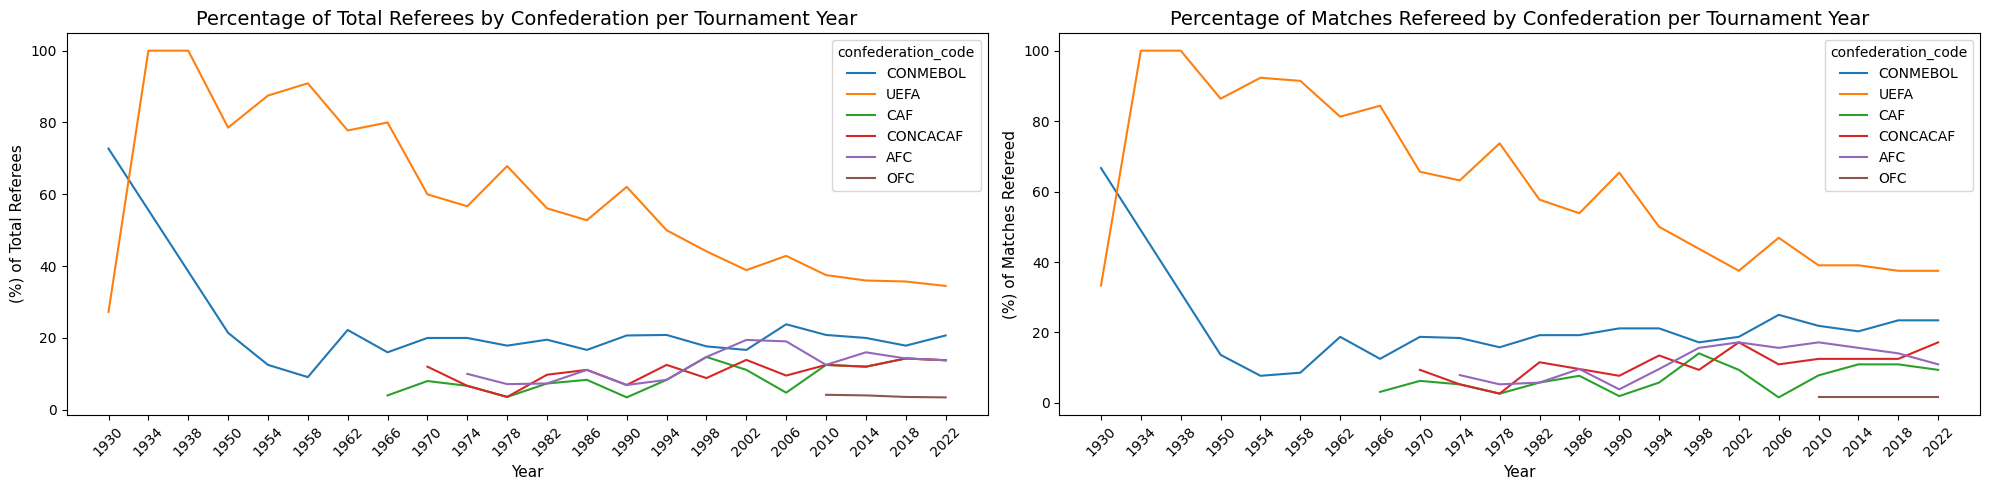

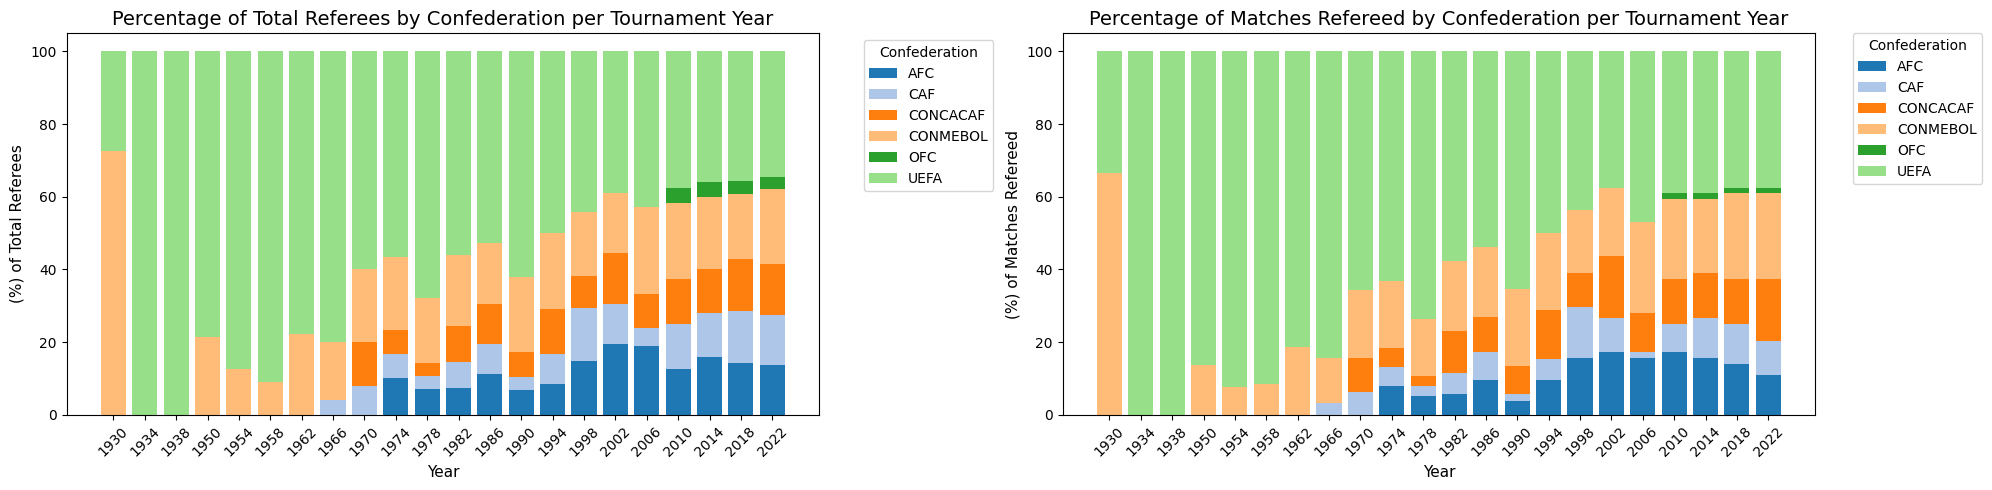

Excluding ['UEFA', 'CONMEBOL']


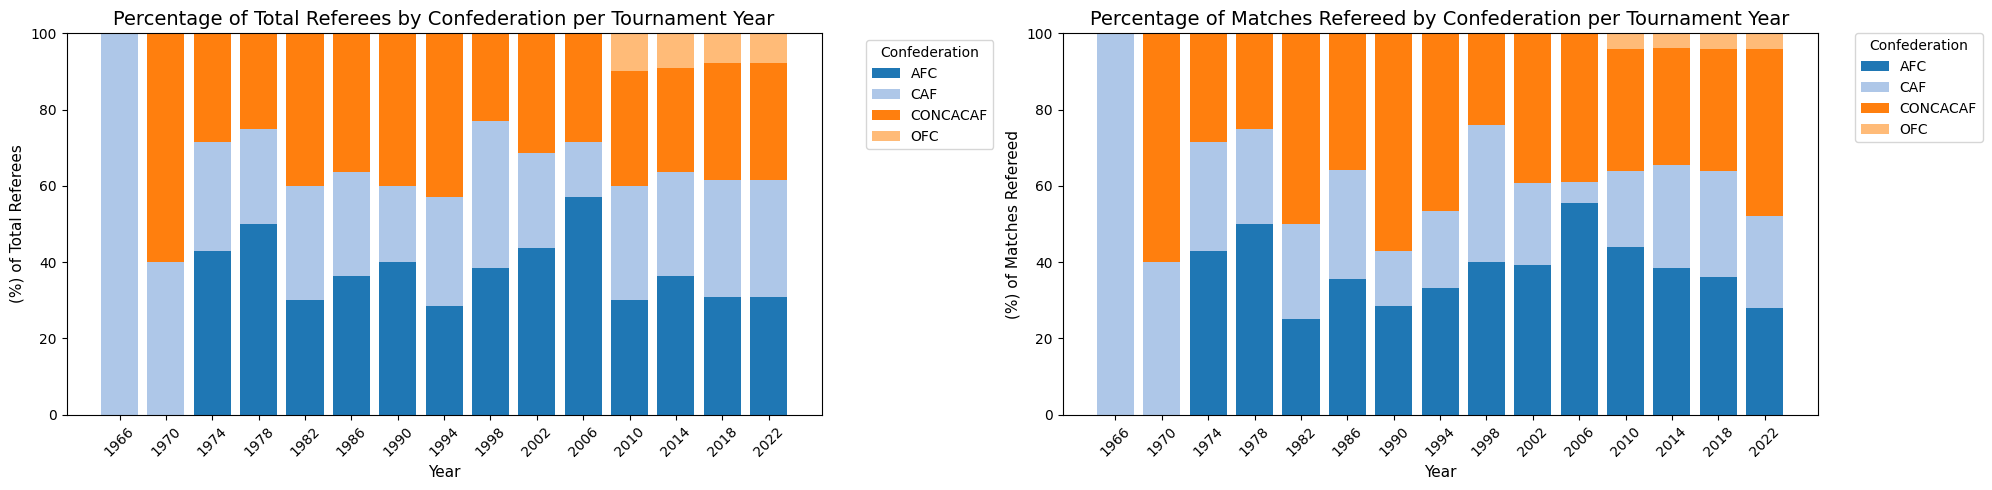

In [19]:

#Show percentage make up of total number of refs by tournament and pc of games reffed


df =ps_helpers.qry_ref_stats()
plt=plot_ref_stats(df,'lin')
plt=plot_ref_stats(df,'bar')

plt.show()


mlist = ['UEFA','CONMEBOL']

#show excluding UEFA
df = qry_ref_stats(mlist)

print(f"Excluding {mlist}")

plt=plot_ref_stats(df,'bar')
plt.show()





<module 'matplotlib.pyplot' from 'e:\\Users\\Pete\\anaconda3\\envs\\env-cspark1\\lib\\site-packages\\matplotlib\\pyplot.py'>

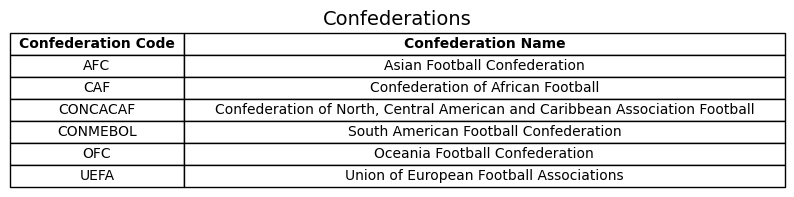

In [330]:
# Explanation of Confederations Full Names
ps_helpers.show_conf_tab()


### Tournament Numbers of Refs/Matches and overall cards issued

 Show Matches/Refs by Tournament Year and Ratio of cards given by Average number of games per ref per tournament 


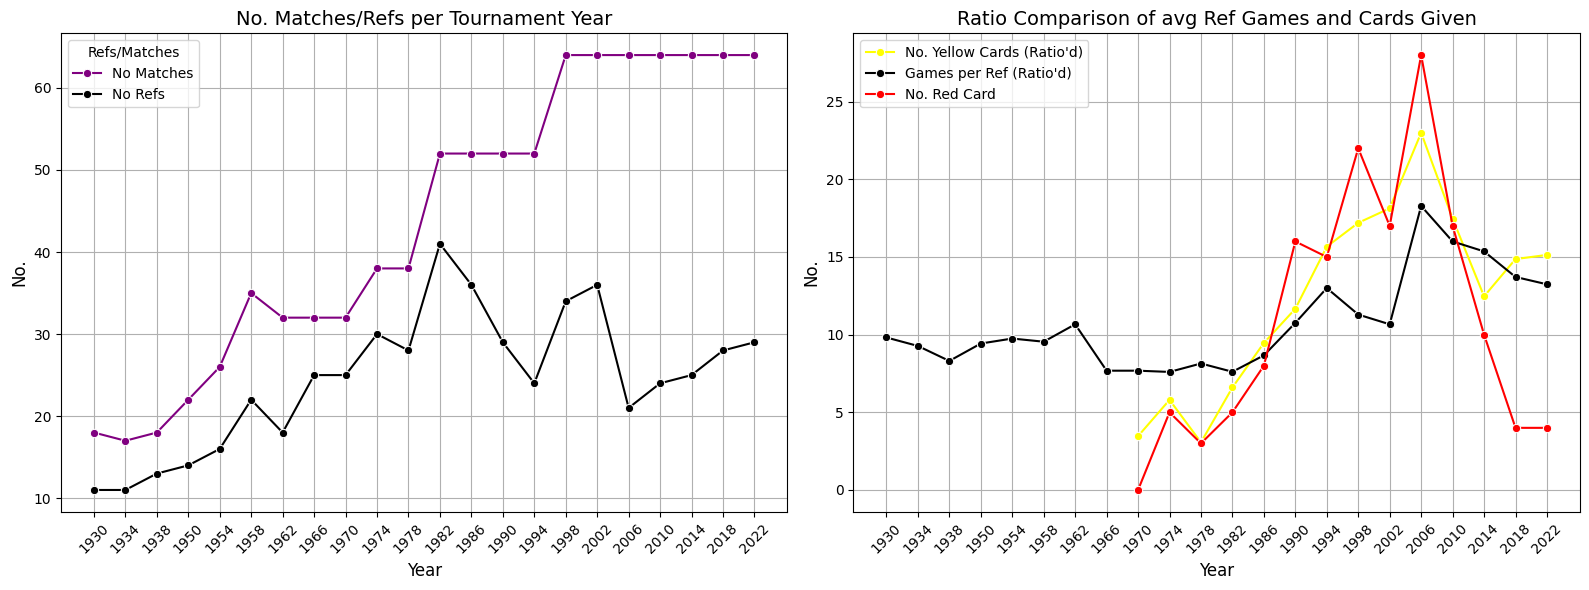

In [20]:
print(" Show Matches/Refs by Tournament Year and Ratio of cards given by Average number of games per ref per tournament ")

df = qry_tourn_counts()
plot_tourn_ratio_mr(df)

### Changes in Team and Referee Numbers

We can see that although team participation in the World Cup has steadily increased over time, notably rising from 16 in 1978 to 24 in 1982 and then again to the current level of a 32 game tournament in 1998. Since then the configuration of 32 teams and 64 games per tournament has persisted.
However, it is noticable that while the the number of teams and matches has been consistent for some time, the number of referees, how many games each referee officiates and the composition of officials by confederation is somewhat more erratic.
After the increase in team participation in 1982 and a comparatively relative rise in the number of referees also, the number of referees officiating per tournament decreased steadily until 1994, meaning an increase in the number of games officated per referee. This is most noticeable in 2006 when the number of referees decreased substantially. This was also the year of the infamous game between Portugal and The Netherlands resulting in a staggering 16 yellow cards and 4 reds, along with other controversies. 

https://en.wikipedia.org/wiki/Battle_of_Nuremberg_(2006_FIFA_World_Cup)

https://en.wikipedia.org/wiki/List_of_2006_FIFA_World_Cup_controversies


### Introduction of Yellow/Red Cards in 1970

The concept of yellow and red cards was introduced to the World Cup in 1970 as can be seen above. It is notable that when the number of teams increased to 24 in 1982 that the number of referees per tournament for the following 3 tournaments saw a steady decrease in referee numbers. As the games per referee increased because of this, the number of red and yellow cards appear to have risen corresponingly.
In 1998, when the number of teams participating rose to the current level of 32, the number of referees also increased. In the following tournament of 2002, the number of referee rose moderately again meaning a slight drop in the number of games per referee.

However, in 2006, despite the number of teams and matches remaining the same, it was decided to drastically reduce the number of referees (to around levels of the 50's and 60's before bookings and cards).
The reasons for this will remain disputed, but it is evident that the 2006 World cup was notorious and saw a sharp rise in both red and yellow cards as well as number of matches with high numbers of red and yellow cards as well other controversies as mentioned in the article linked above. The tournament concluded with the infamous headbutt by Zinedine Zidane, earning himself a red card in France's loss in the final.
The number of referees officiating has stadily risen ever since.

** The numbers above have been ratio'd for comparison purposes, with red cards shown as actual numbers, ratio of games per ref multiplied by 6, and total number of yellow cards divided by 15
*(ratio's in sql in helper file functions)


### Introduction of VAR in 2018

Although Video Assisted Referee's (VAR) were not officially introduced until the 2018 tournament, there is much speculation that the first video based decision was the Zidane headbutt given the extended time period between the action and the red card being issued.
The introduction of VAR in 2018 saw a dramatic fall in the number of red cards issued, matched by an increase in the number of yellow cards. The interpretation of this is open to speculation but would suggest incident previously judged on field as red card offences being decided to warrant a lesser punishment upon review.


## Further Analysis/Conclusion

Whilst further analysis has been conducted in both SQL and visualised in other tools such as Tableau and Excel, it is evident that no clear conclusions can be made purely from the evidence presented in this notebook.
I recognise now, that I left too much to do on the jupyter notebook presentation in too little time.
Further areas which I began to explore and will continue doing so are the relationshiup between certain confederations and countries with a higher propensity to book teams from both certain countries and countries which are members of certain confederations. Analysis of cards by playing position, comparison of teams/confed to averages per tournamount as well as host country and other geographies are also further areas to explore. Much preparatory work on other areas has been done which remains unpresented at this time.

This work will continue as I expand my Python skill...


## EDA 

Explore data, look at the spread, outliers and relationships.


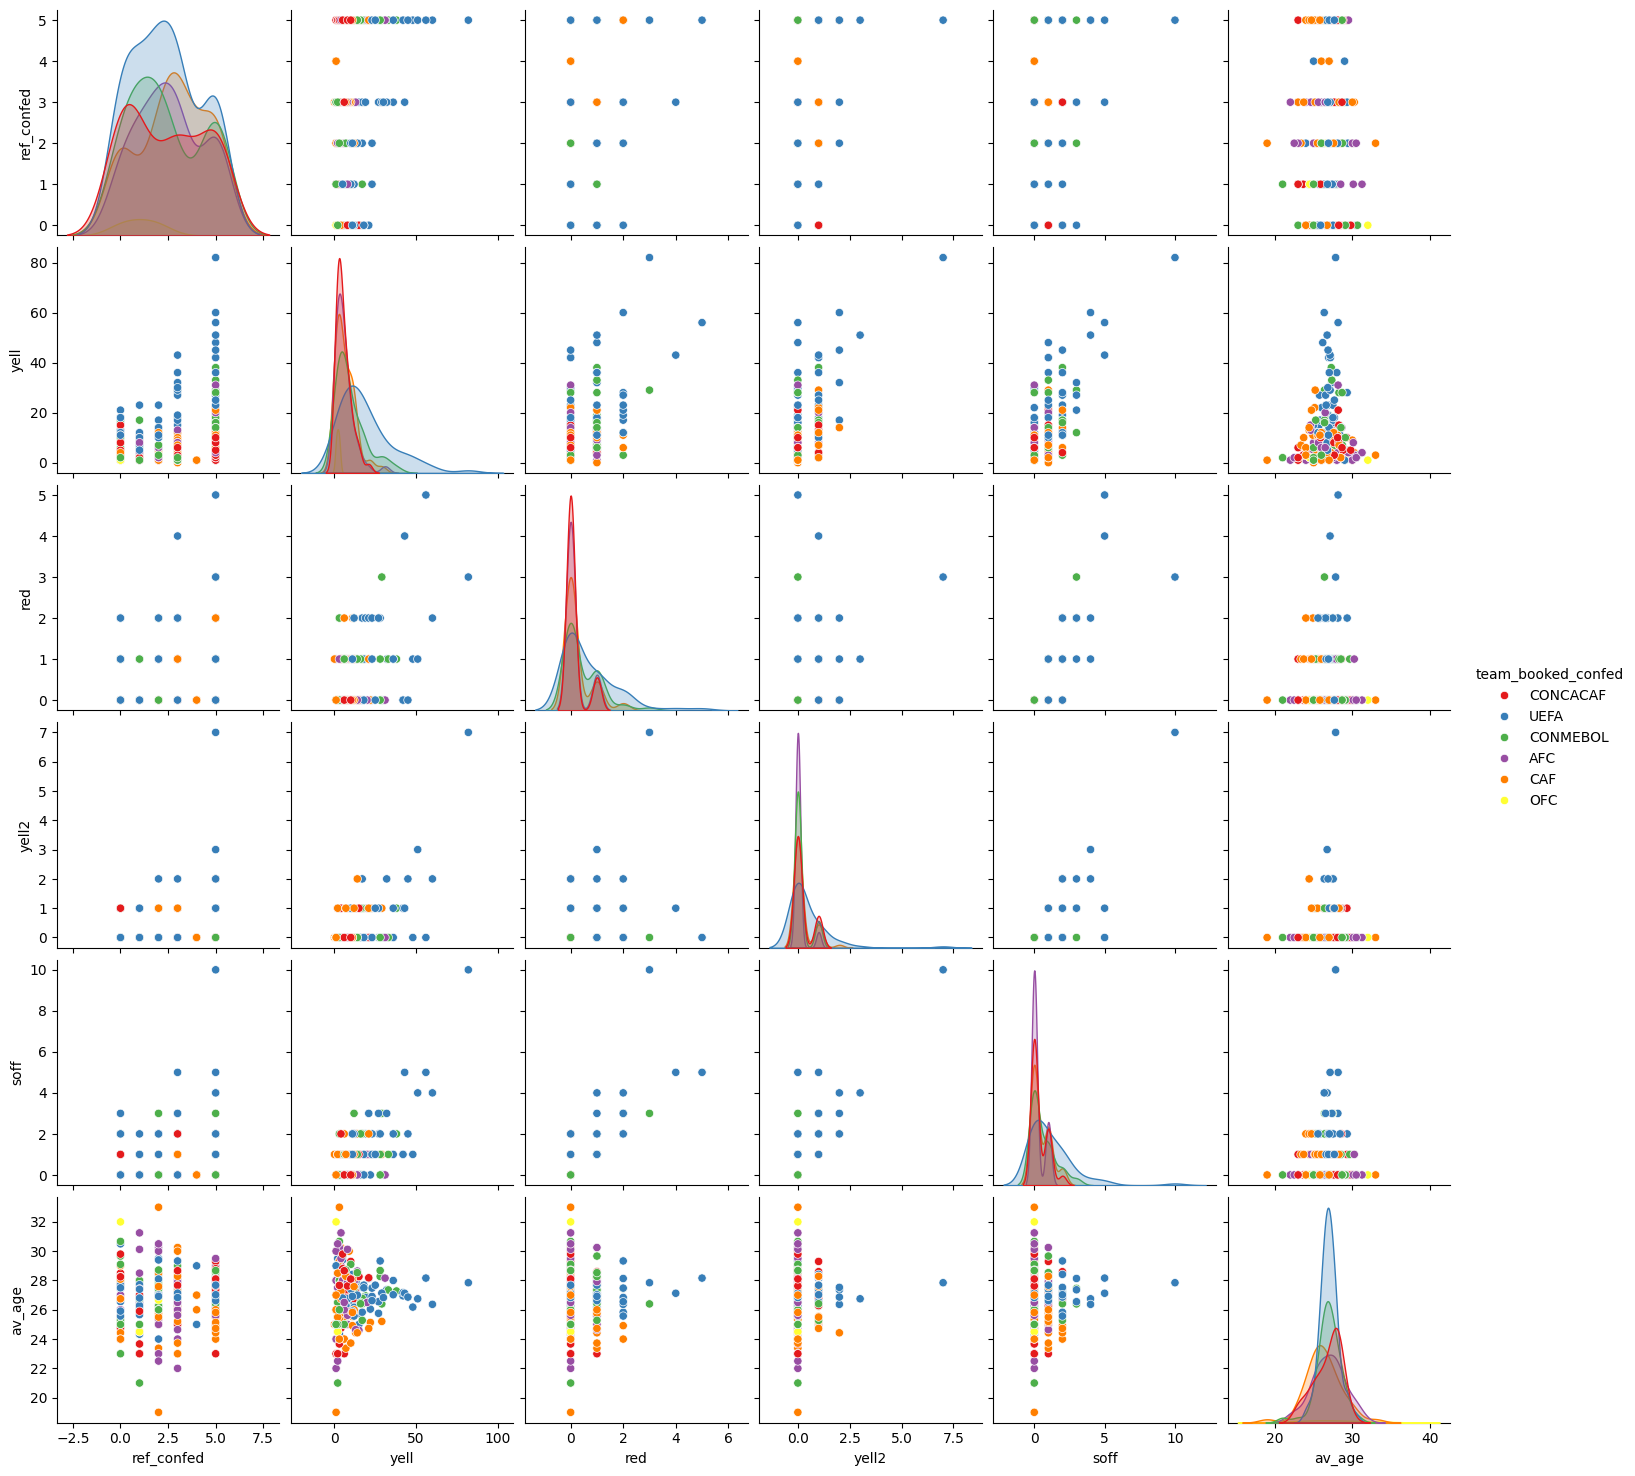

In [293]:
dfc = qry_conf_book()
dfc_numcat = dfc.copy()
dfc_numcat['ref_confed'] = dfc_numcat['ref_confed'].astype('category')
#dfc_numcat['team_booked_confed'] = dfc_numcat['team_booked_confed'].astype('category')
dfc_numcat['ref_confed'] = dfc_numcat['ref_confed'].cat.codes
#dfc_numcat['team_booked_confed'] = dfc_numcat['team_booked_confed'].cat.codes
sns.pairplot(dfc_numcat, hue='team_booked_confed', palette='Set1')

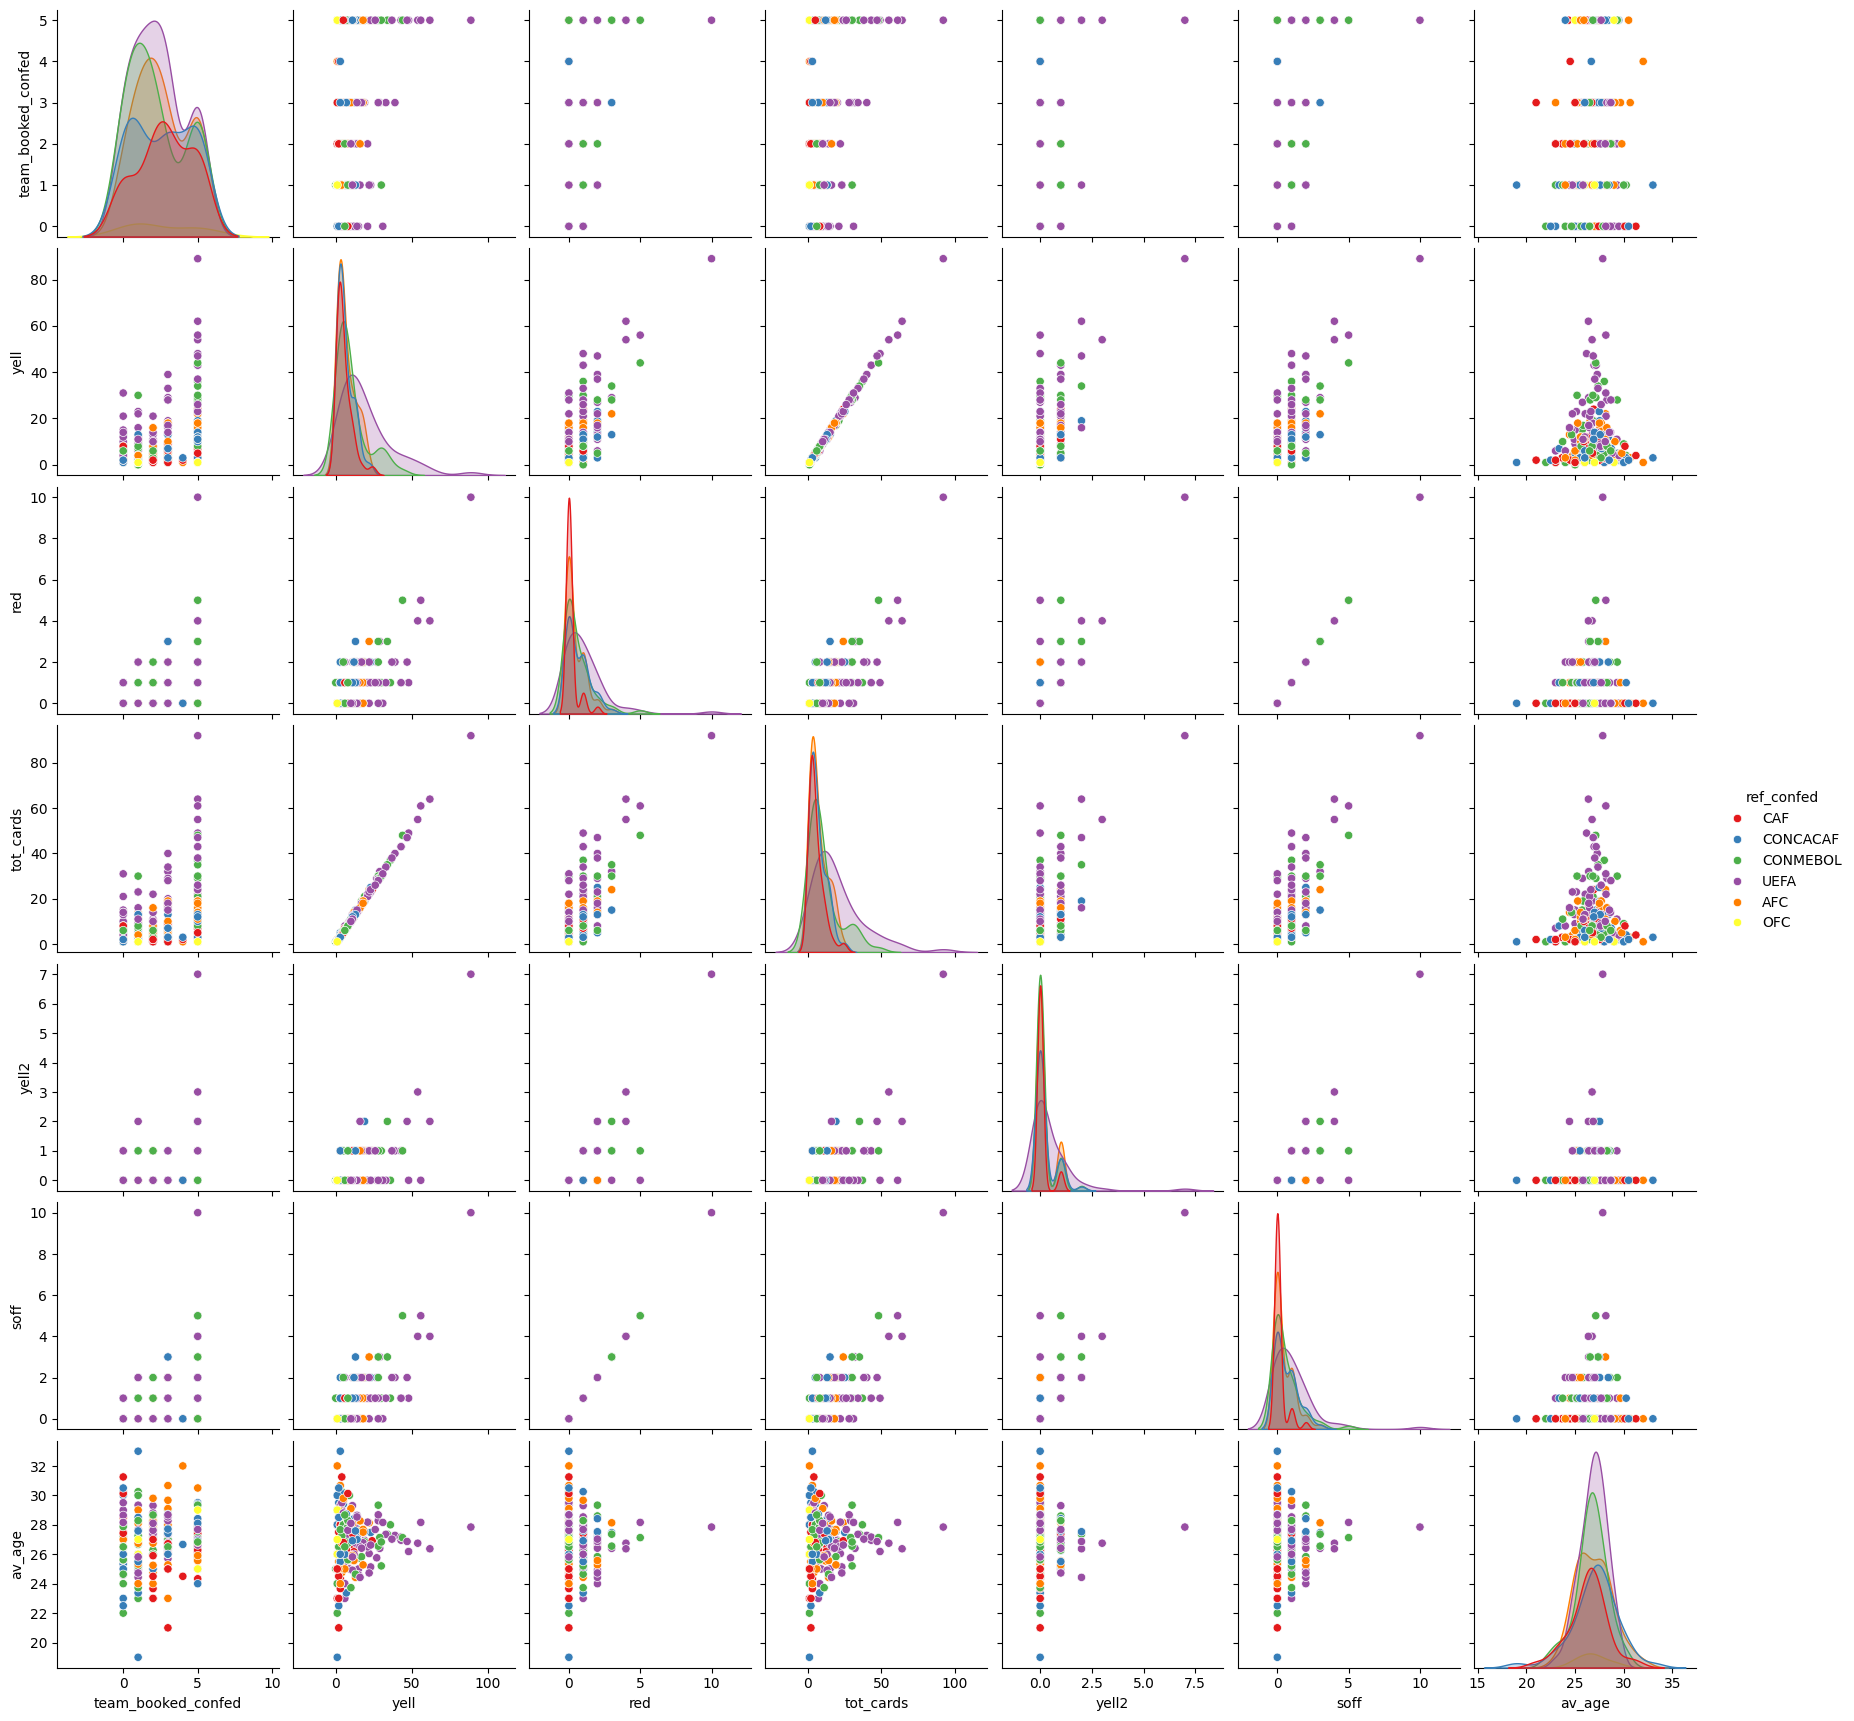

In [297]:
dfc = qry_conf_book()
dfc_numcat = dfc.copy()
#dfc_numcat['ref_confed'] = dfc_numcat['ref_confed'].astype('category')
dfc_numcat['team_booked_confed'] = dfc_numcat['team_booked_confed'].astype('category')
#dfc_numcat['ref_confed'] = dfc_numcat['ref_confed'].cat.codes
dfc_numcat['team_booked_confed'] = dfc_numcat['team_booked_confed'].cat.codes
sns.pairplot(dfc_numcat, hue='ref_confed', palette='Set1')

In [308]:
qry_tourn_counts()

,tournament_id,year,count_teams,count_matches,count_refs,ref_game_ratio,num_yellow_rat,num_red,num_yellow
0,WC-1930,1930,13,18,11,16.363636,NaN,NaN,NaN
1,WC-1934,1934,16,17,11,15.454545,NaN,NaN,NaN
2,WC-1938,1938,15,18,13,13.846154,NaN,NaN,NaN
3,WC-1950,1950,13,22,14,15.714286,NaN,NaN,NaN
4,WC-1954,1954,16,26,16,16.250000,NaN,NaN,NaN
5,WC-1958,1958,16,35,22,15.909091,NaN,NaN,NaN
6,WC-1962,1962,16,32,18,17.777778,NaN,NaN,NaN
7,WC-1966,1966,16,32,25,12.800000,NaN,NaN,NaN
8,WC-1970,1970,16,32,25,12.800000,5.2,0.0,52.0
9,WC-1974,1974,16,38,30,12.666667,8.7,5.0,87.0


Excluding UEFA


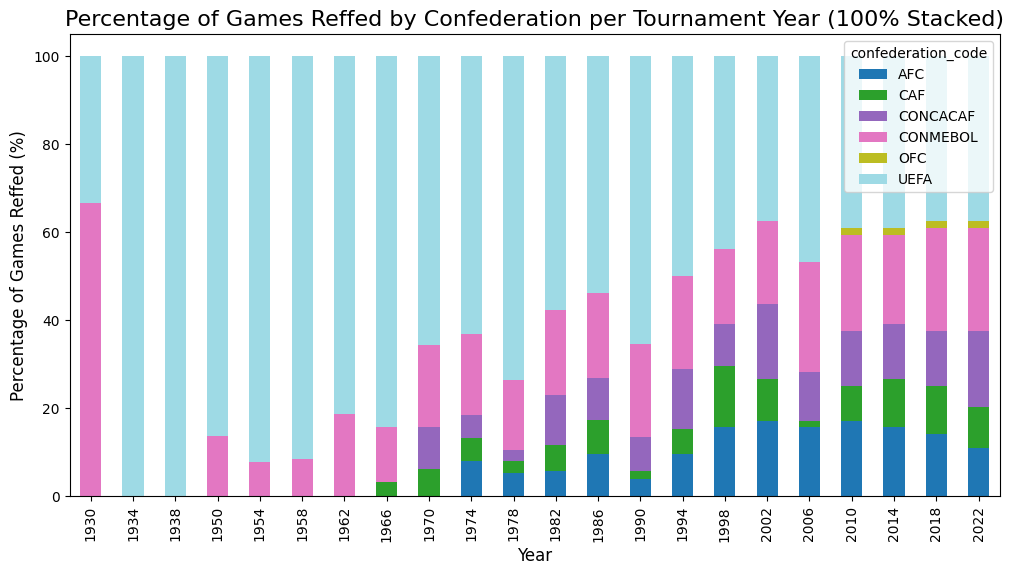

In [309]:
#show as 1 excluding UEFA
df = qry_ref_stats('UEFA')
plt = plot_100_single(df)
print("Excluding UEFA")
plt.show()

In [310]:
df_numz = dfc.copy()
for ncol in df_numz.columns:
    if df_numz[ncol].dtype == 'object':
        #print (df_numz[ncol].name)
        #print(df_numz[ncol].dtype)
        df_numz[ncol] = df_numz[ncol].astype('category')
        #print(df_numz[ncol].name)
        df_numz[ncol] = df_numz[ncol].cat.codes
        #print(df_numz[ncol])
        
df_numz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tournament_year     253 non-null    int8   
 1   ref_confed          253 non-null    int8   
 2   team_booked_confed  253 non-null    int8   
 3   yell                253 non-null    int64  
 4   red                 253 non-null    int64  
 5   tot_cards           253 non-null    int64  
 6   yell2               253 non-null    int64  
 7   soff                253 non-null    int64  
 8   av_age              253 non-null    float64
dtypes: float64(1), int64(5), int8(3)
memory usage: 12.7 KB


In [312]:
df_numz = df.copy()
for ncol in df_numz.columns:
    if df_numz[ncol].dtype == 'object':
        #print (df_numz[ncol].name)
        #print(df_numz[ncol].dtype)
        df_numz[ncol] = df_numz[ncol].astype('category')
        #print(df_numz[ncol].name)
        df_numz[ncol] = df_numz[ncol].cat.codes
        #print(df_numz[ncol])
        
df_numz.info()
#df_numz['manager_country_confed']
#df_numz.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   tournament_id        88 non-null     int8   
 1   year                 88 non-null     int8   
 2   confederation_code   88 non-null     int8   
 3   tot_refs_conf        88 non-null     float64
 4   tot_refs_tourn       88 non-null     float64
 5   pc_total_refs_tourn  88 non-null     float64
 6   tot_refmatch_conf    88 non-null     float64
 7   tot_refmatch_tourn   88 non-null     float64
 8   pc_game_reffed       88 non-null     float64
dtypes: float64(6), int8(3)
memory usage: 4.5 KB


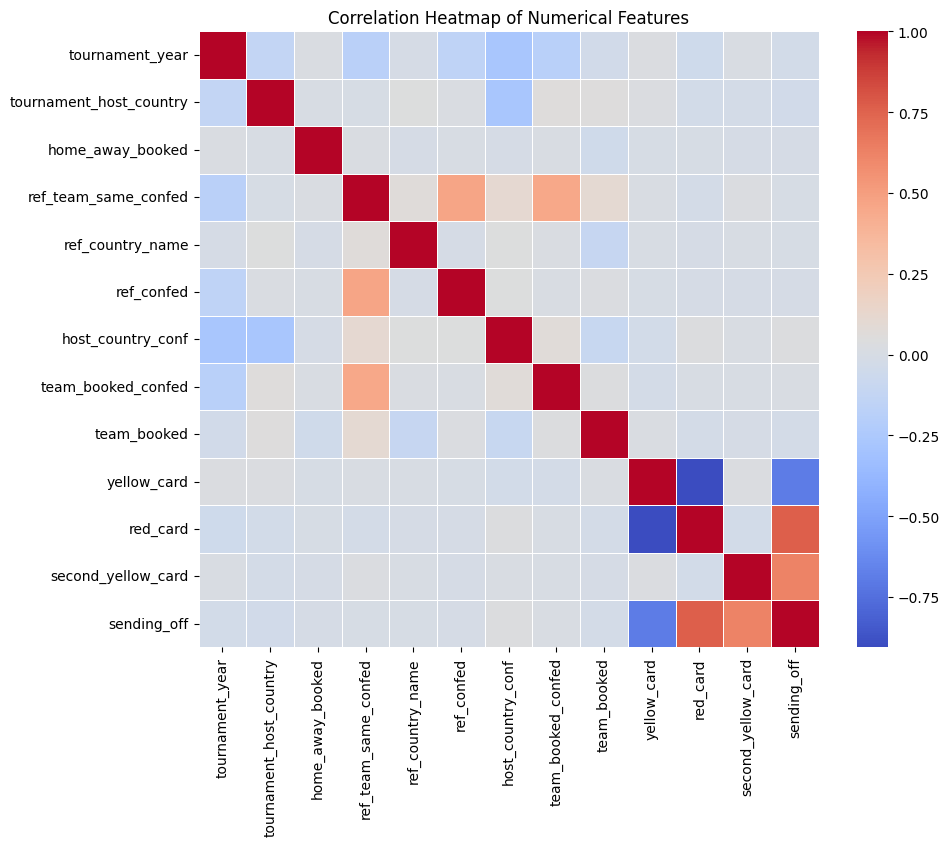

In [56]:
#ex heatmap corr

corr_mtx = df_numz.select_dtypes(include='number').corr()
corr_mtx.head()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtx, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [15]:


df = qry_book_det()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   bk_key_id                   2624 non-null   int64 
 1   booking_id                  2624 non-null   object
 2   tournament_id               2624 non-null   object
 3   tournament_host_country     2624 non-null   object
 4   home_away_booked            2624 non-null   object
 5   ref_team_same_confed        2624 non-null   object
 6   ref_country_name            2624 non-null   object
 7   ref_confed                  2624 non-null   object
 8   host_country_conf           2624 non-null   object
 9   team_booked_confed          2624 non-null   object
 10  team_booked                 2624 non-null   object
 11  any_book                    2624 non-null   int64 
 12  yellow_card                 2624 non-null   int64 
 13  red_card                    2624 non-null   int6

In [ ]:

#Missing Data 
dfbdn_all = qry_b()
dfbdn_all.isna().sum()
#dby.isna().sum()

bk_key_id                     0
booking_id                    0
tournament_host_country       0
home_away_booked              0
ref_team_same_confed          0
ref_country_name              0
ref_confed                    0
host_country_conf             0
team_booked_confed            0
team_booked                   0
any_book                      0
yellow_card                   0
red_card                      0
second_yellow_card            0
sending_off                   0
tournament_name               0
team_id_booked                0
team_code_booked              0
tournament_year               0
host_country_team_booking     0
host_country                  0
stadium_country_name          0
stadium_name                  0
stadium_capacity              0
stadium_city_name             0
match_date                    0
bk_match_id                   0
match_name                    0
booked_player_det             0
player_age                    0
player_age_dec                0
booked_p

In [ ]:
qr

In [ ]:

#Missing Data 
dfbdn_all = qry_b()
dfbdn_all.isna().sum()
#dby.isna().sum()

bk_key_id                     0
booking_id                    0
tournament_host_country       0
home_away_booked              0
ref_team_same_confed          0
ref_country_name              0
ref_confed                    0
host_country_conf             0
team_booked_confed            0
team_booked                   0
any_book                      0
yellow_card                   0
red_card                      0
second_yellow_card            0
sending_off                   0
tournament_name               0
team_id_booked                0
team_code_booked              0
tournament_year               0
host_country_team_booking     0
host_country                  0
stadium_country_name          0
stadium_name                  0
stadium_capacity              0
stadium_city_name             0
match_date                    0
bk_match_id                   0
match_name                    0
booked_player_det             0
player_age                    0
player_age_dec                0
booked_p

In [11]:
qry_

,tournament_id,count_teams,count_matches,yellows,av_yell_pg,av_red_pg
0,WC-1930,13,18,NaN,NaN,NaN
1,WC-1934,16,17,NaN,NaN,NaN
2,WC-1938,15,18,NaN,NaN,NaN
3,WC-1950,13,22,NaN,NaN,NaN
4,WC-1954,16,26,NaN,NaN,NaN
5,WC-1958,16,35,NaN,NaN,NaN
6,WC-1962,16,32,NaN,NaN,NaN
7,WC-1966,16,32,NaN,NaN,NaN
8,WC-1970,16,32,52.0,1.625000,0.000000
9,WC-1974,16,38,87.0,2.289474,0.131579


In [305]:
dfc = qry_conf_book()
dfc_numcat = dfc.copy()
dfc_numcat['ref_confed'] = dfc_numcat['ref_confed'].astype('category')
dfc_numcat['team_booked_confed'] = dfc_numcat['team_booked_confed'].astype('category')
dfc_numcat['ref_confed'] = dfc_numcat['ref_confed'].cat.codes
dfc_numcat['team_booked_confed'] = dfc_numcat['team_booked_confed'].cat.codes

        #print(df_numz[ncol].name)
        #df_numz[ncol] = df_numz[ncol].cat.codes
dfc_numcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tournament_year     253 non-null    object 
 1   ref_confed          253 non-null    int8   
 2   team_booked_confed  253 non-null    int8   
 3   yell                253 non-null    int64  
 4   red                 253 non-null    int64  
 5   tot_cards           253 non-null    int64  
 6   yell2               253 non-null    int64  
 7   soff                253 non-null    int64  
 8   av_age              253 non-null    float64
dtypes: float64(1), int64(5), int8(2), object(1)
memory usage: 14.5+ KB


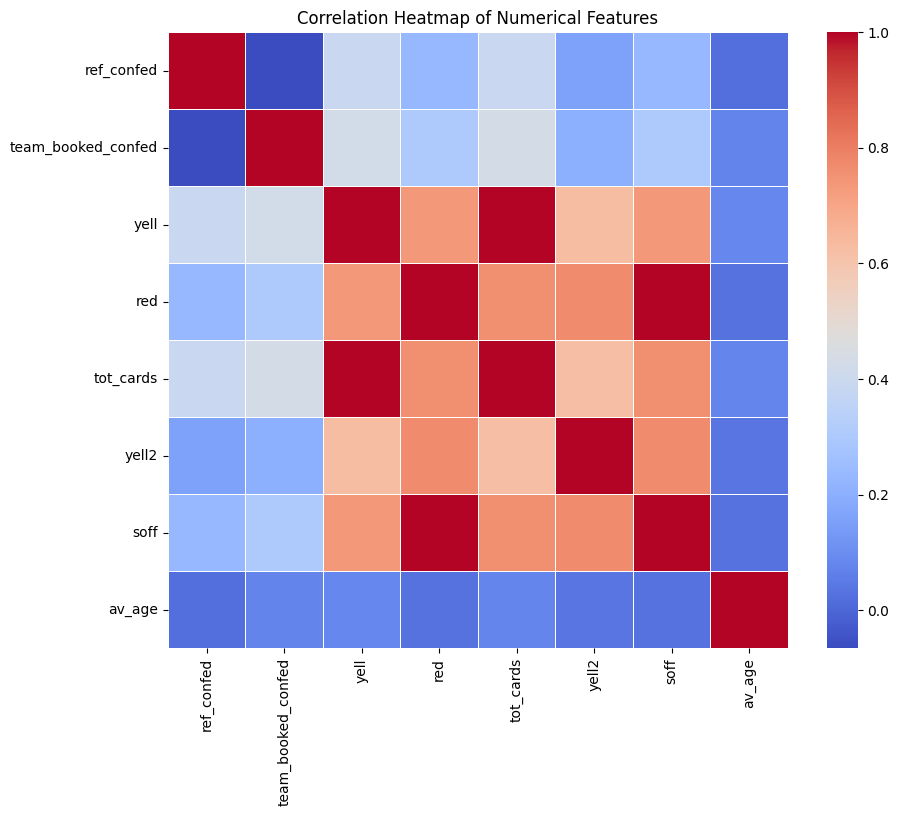

In [314]:
#ex heatmap corr

corr_mtx = dfc_numcat.select_dtypes(include='number').corr()
corr_mtx.head()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtx, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [298]:
qry_conf_book()


,tournament_year,ref_confed,team_booked_confed,yell,red,tot_cards,yell2,soff,av_age
0,1970,CAF,CONCACAF,4,0,4,0,0,26.000000
1,1970,CAF,UEFA,3,0,3,0,0,24.333333
2,1970,CONCACAF,UEFA,2,0,2,0,0,29.500000
3,1970,CONMEBOL,CONCACAF,2,0,2,0,0,28.000000
4,1970,CONMEBOL,CONMEBOL,1,0,1,0,0,29.000000
...,...,...,...,...,...,...,...,...,...
248,2022,UEFA,AFC,31,0,31,0,0,28.161290
249,2022,UEFA,CAF,11,0,11,0,0,25.818182
250,2022,UEFA,CONCACAF,10,0,10,0,0,28.100000
251,2022,UEFA,CONMEBOL,28,0,28,0,0,28.678571


In [299]:
dfc= qry_conf_book()
dfc.head()

,tournament_year,ref_confed,team_booked_confed,yell,red,tot_cards,yell2,soff,av_age
0,1970,CAF,CONCACAF,4,0,4,0,0,26.000000
1,1970,CAF,UEFA,3,0,3,0,0,24.333333
2,1970,CONCACAF,UEFA,2,0,2,0,0,29.500000
3,1970,CONMEBOL,CONCACAF,2,0,2,0,0,28.000000
4,1970,CONMEBOL,CONMEBOL,1,0,1,0,0,29.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tournament_year     253 non-null    object 
 1   ref_confed          253 non-null    object 
 2   team_booked_confed  253 non-null    object 
 3   yell                253 non-null    int64  
 4   red                 253 non-null    int64  
 5   tot_cards           253 non-null    int64  
 6   yell2               253 non-null    int64  
 7   soff                253 non-null    int64  
 8   av_age              253 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 17.9+ KB


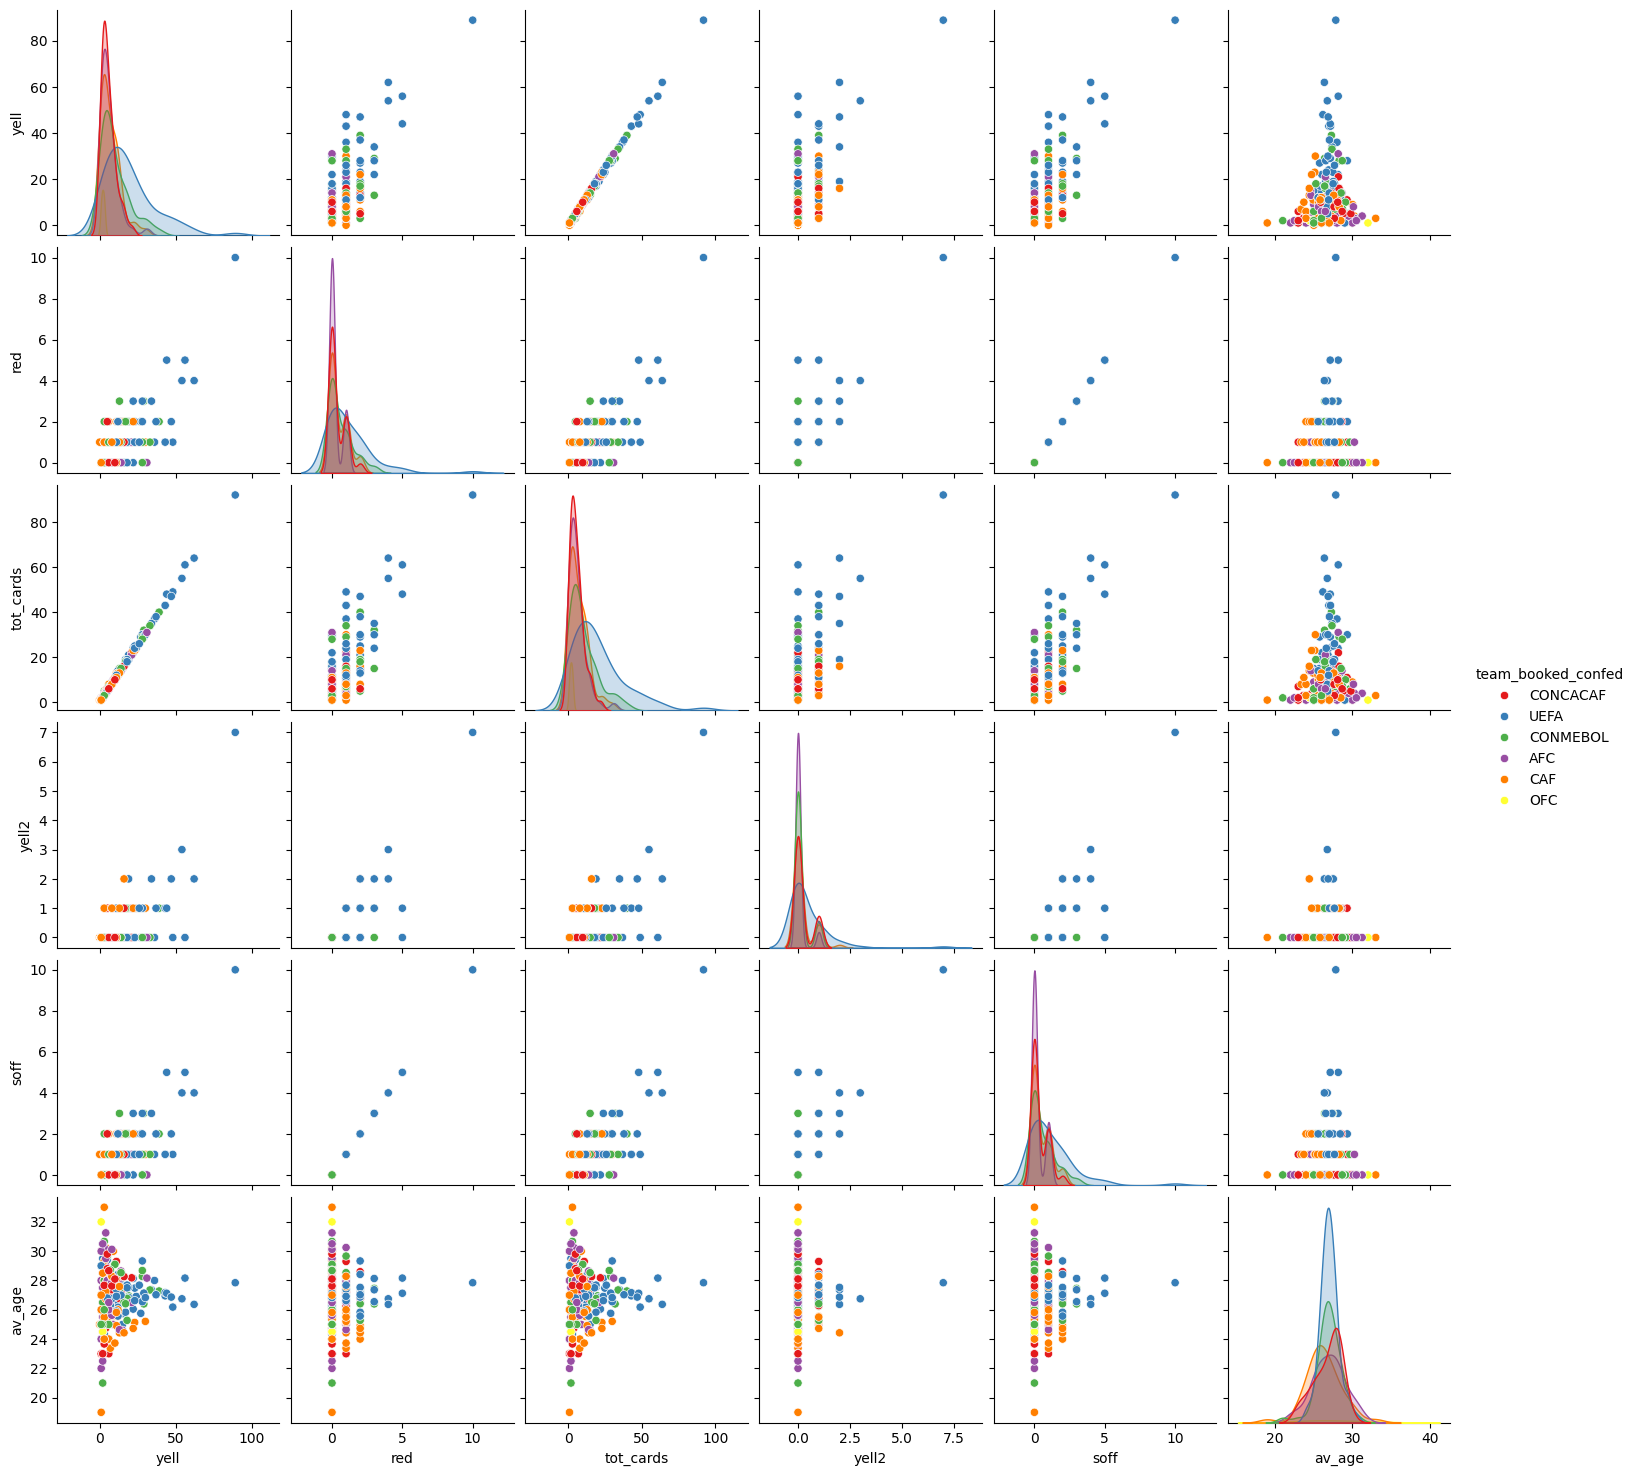

In [315]:
dfc= qry_conf_book()
dfc.head()
dfc.info()

sns.pairplot(dfc, hue='team_booked_confed', palette='Set1');
#sns.pairplot(dfc.select_dtypes(include='number'))

In [42]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product        180 non-null    object
 1   age            180 non-null    int64 
 2   gender         180 non-null    object
 3   education      180 non-null    int64 
 4   maritalstatus  180 non-null    object
 5   usage          180 non-null    int64 
 6   fitness        180 non-null    int64 
 7   income         180 non-null    int64 
 8   miles          180 non-null    int64 
 9   uniqueid       180 non-null    int64 
 10  is_male        180 non-null    int64 
 11  is_partnered   180 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 17.0+ KB


In [46]:
dfc.head()

,tournament_id,tournament_year,tournament_host_country,home_away_booked,ref_team_same_confed,ref_country_name,ref_confed,host_country_conf,team_booked_confed,team_booked,yellow_card,red_card,second_yellow_card,sending_off,tournament_name,player_age,player_age
0,WC-1970,1970,Mexico,Away,1,West Germany,UEFA,CONCACAF,UEFA,Soviet Union,1,0,0,0,1970 FIFA Men's World Cup,23,23
1,WC-1970,1970,Mexico,Away,1,West Germany,UEFA,CONCACAF,UEFA,Soviet Union,1,0,0,0,1970 FIFA Men's World Cup,22,22
2,WC-1970,1970,Mexico,Away,1,West Germany,UEFA,CONCACAF,UEFA,Soviet Union,1,0,0,0,1970 FIFA Men's World Cup,21,21
3,WC-1970,1970,Mexico,Home,0,West Germany,UEFA,CONCACAF,CONCACAF,Mexico,1,0,0,0,1970 FIFA Men's World Cup,28,28
4,WC-1970,1970,Mexico,Away,1,West Germany,UEFA,CONCACAF,UEFA,Soviet Union,1,0,0,0,1970 FIFA Men's World Cup,28,28


In [21]:
# red cards

sns.lineplot(
    data=dby, 
    x='tournament_year', 
    y='red'
)


# Adjust layout to prevent overlap and improve appearance
#fig.tight_layout()
plt.show()

NameError: name 'dby' is not defined

In [316]:
dfb = qry_book_dn_conf()
dfb.head()

,bk_key_id,booking_id,tournament_host_country,tournament_year,match_date,match_name,host_country_team_booking,host_country,ref_team_same_confed,ref_country_name,...,total_cards,total_yellow,total_red,second_yellow_card,sending_off,tournament_name,stadium_country_name,stadium_capacity,match_period,in_stoppage
0,1604,B-1604,Germany,2006,2006-06-13,South Korea vs Togo,0,N,0,England,...,2,2,1,1,1,2006 FIFA Men's World Cup,Germany,62000,first half,0
1,678,B-0678,United States,1994,1994-06-20,Netherlands vs Saudi Arabia,0,N,0,Spain,...,1,1,0,0,0,1994 FIFA Men's World Cup,United States,53000,first half,0
2,538,B-0538,Italy,1990,1990-06-21,England vs Egypt,0,N,0,Switzerland,...,1,1,0,0,0,1990 FIFA Men's World Cup,Italy,35000,first half,0
3,3020,B-3020,Qatar,2022,2022-11-26,Tunisia vs Australia,0,N,0,Germany,...,1,1,0,0,0,2022 FIFA Men's World Cup,Qatar,44000,second half,0
4,2974,B-2974,Qatar,2022,2022-11-22,Argentina vs Saudi Arabia,0,N,0,Slovenia,...,1,1,0,0,0,2022 FIFA Men's World Cup,Qatar,89000,second half,0


In [318]:
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   bk_key_id                  2624 non-null   object
 1   booking_id                 2624 non-null   object
 2   tournament_host_country    2624 non-null   object
 3   tournament_year            2624 non-null   object
 4   match_date                 2624 non-null   object
 5   match_name                 2624 non-null   object
 6   host_country_team_booking  2624 non-null   object
 7   host_country               2624 non-null   object
 8   ref_team_same_confed       2624 non-null   object
 9   ref_country_name           2624 non-null   object
 10  ref_confed                 2624 non-null   object
 11  host_country_conf          2624 non-null   object
 12  team_booked_confed         2624 non-null   object
 13  team_booked                2624 non-null   object
 14  home_awa

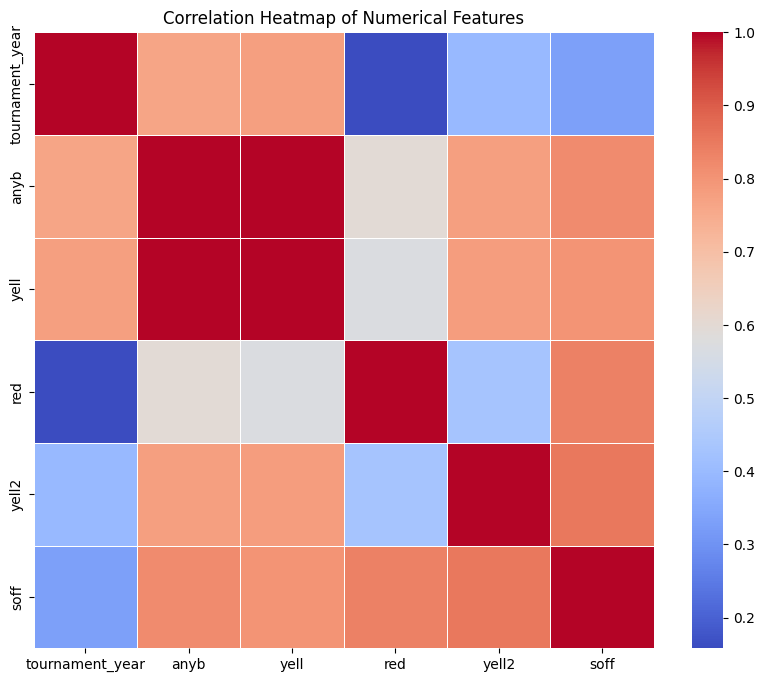

In [55]:
#ex heatmap corr

corr_mtx = dby.select_dtypes(include='number').corr()
corr_mtx.head()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mtx, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

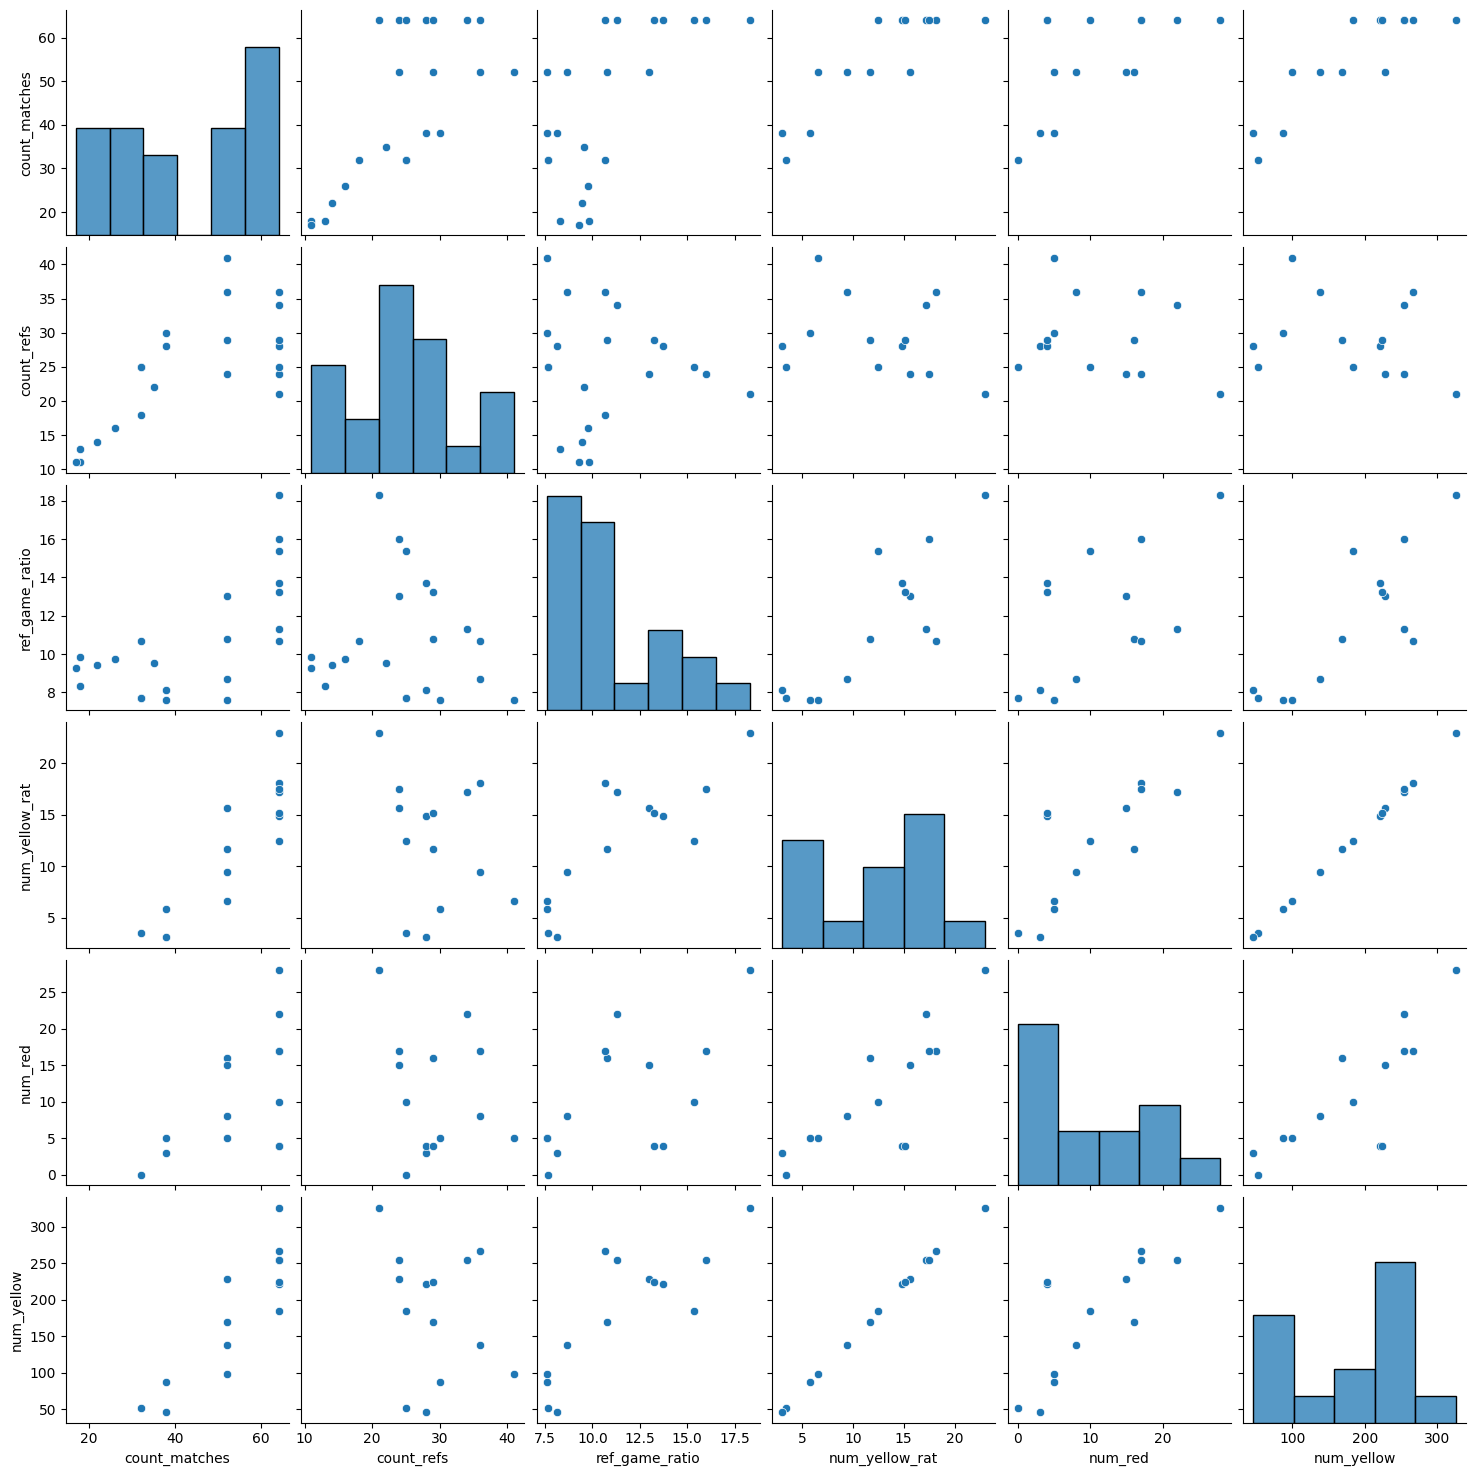

In [22]:

sns.pairplot(df.select_dtypes(include='number'))
plt.show()

In [323]:
#Missing Data 
df.isna().sum()

tournament_id          0
year                   0
confederation_code     0
tot_refs_conf          0
tot_refs_tourn         0
pc_total_refs_tourn    0
tot_refmatch_conf      0
tot_refmatch_tourn     0
pc_game_reffed         0
dtype: int64

In [ ]:

sns.pairplot(df.select_dtypes(include='number'))
plt.show()


In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


## Further Visualisation


Further Visualization would go here to examine other relationships more closely

### Functions

In [68]:
def plot_100_single_test(df, xdfcol, ydfcol, dfvals, ttl100=''):
    # Pivot the data to get it in a suitable format for stacked bar plot
    df_pc_game_piv = df.pivot_table(index=xdfcol, columns=ydfcol, values=dfvals, fill_value=0)

    # Plotting the 100% stacked bar chart
    df_pc_game_piv.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

    # Add titles and labels
 #   plt.title('Percentage of Games Reffed by Confederation per Tournament Year (100% Stacked)', fontsize=16)
    plt.title(ttl100+' (100% Stacked)', fontsize=16)
    plt.xlabel(xdfcol, fontsize=12)
    plt.ylabel(ydfcol, fontsize=12)

    return plt


## Grayeyard

In [289]:
# show make up of percentage of referees per tourn and pc games reffed
df = qry_ref_stats()

ycat = 'year' #'year'
xcat = 'confederation_code'
myvals = 'pc_game_reffed'
ttl100 = f"Percentage of {myvals} by {xcat} by {ycat}"

plot_100_single_test(df,ycat,xcat,myvals,ttl100)

print(ttl100) 

#	tournament_id	year	confederation_code	tot_refs_conf	tot_refs_tourn	pc_total_refs_tourn	tot_refmatch_conf	tot_refmatch_tourn	pc_game_reffed
#plot_ref_stats(df,'lin')
#plot_ref_stats(df,'bar')

NameError: name 'plot_100_single_test' is not defined

In [ ]:
from IPython.display import display


In [78]:
import matplotlib
# matplotlib.use('qtagg')
plt.figure(figsize=(12, 12))
#plt.figure().set_figwidth(25)
plt.figure(figsize=(12, 12))

df_ref.boxplot(column='no_teams', by='year')

#plt.bar(df_ref,height=12,column='no_teams', by='year')
plt.title('Boxplot of num teams by year')
plt.xlabel('Year')
plt.ylabel('Num Teams')
plt.show()

#plt.figure.savefig('MyFigure.png')



NameError: name 'df_ref' is not defined

<Figure size 1200x1200 with 0 Axes>

<Figure size 1200x1200 with 0 Axes>

In [ ]:
plt.close('all')

# Create a large figure for the bar chart
plt.figure(figsize=(4, 6))  # Width: 12 inches, Height: 8 inches

x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(1, 2,1)
plt.plot(x1, y1, 'ko-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')
 

plt.subplot(1, 2,2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.tight_layout()

plt.show()

NameError: name 'agg' is not defined

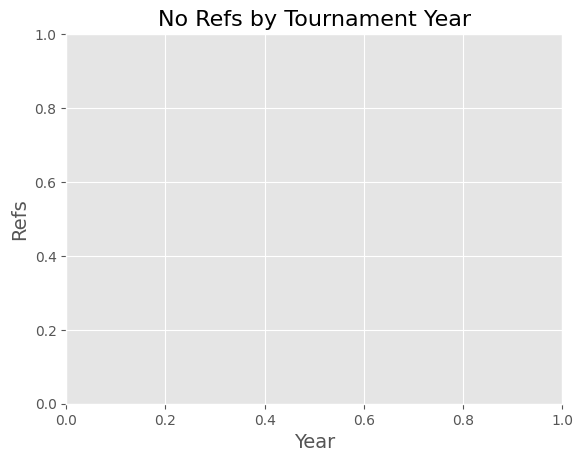

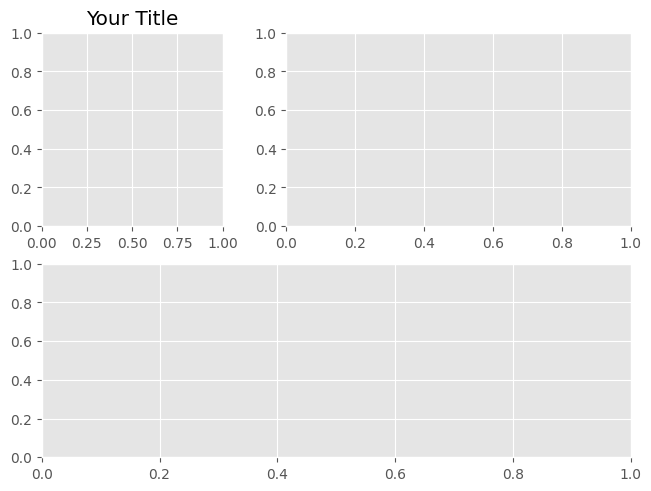

In [82]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook


plt.title('No Refs by Tournament Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Refs', fontsize=14)

fig, axd = plt.subplot_mosaic(
    [["topl", "topr"],
     ["bot", "bot"]],
    layout="constrained",
    # "image" will contain a square image. We fine-tune the width so that
    # there is no excess horizontal or vertical margin around the image.
    width_ratios=[1.05, 2],
)

# Load the MRI data (256x256 16-bit integers)
with cbook.get_sample_data('s1045.ima.gz') as dfile:
    im = np.frombuffer(dfile.read(), np.uint16).reshape((256, 256))

# Plot the MRI image

axd["topl"].set(title="Your Title")
#plt.plot(agg['year'], agg['no_ref_games'], marker='', linestyle='-', color='g', label='Num Games')
axd["topl"].plot(agg['year'], agg['no_ref_games'], marker='', linestyle='-', color='g', label='Num Games')
axd["topl"].axis('on')

# Plot the histogram of MRI intensity
im = im[im.nonzero()]  # Ignore the background
axd["topr"].hist(im, bins=np.arange(0, 2**16+1, 512))
axd["topr"].set(xlabel='Intensity (a.u.)', xlim=(0, 2**16),
                   ylabel='MRI density', yticks=[])
axd["topr"].minorticks_on()

# Load the EEG data
n_samples, n_rows = 800, 4
with cbook.get_sample_data('eeg.dat') as eegfile:
    data = np.fromfile(eegfile, dtype=float).reshape((n_samples, n_rows))
t = 10 * np.arange(n_samples) / n_samples

# Plot the EEG
axd["bot"].set_xlabel('Year')
axd["bot"].set_xlim(0, 10)
dy = (data.min() - data.max()) * 0.7  # Crowd them a bit.
axd["bot"].set_ylim(-dy, n_rows * dy)
axd["bot"].set_yticks([0, dy, 2*dy, 3*dy], labels=['PG3', 'PG5', 'PG7', 'PG9'])

for i, data_col in enumerate(data.T):
    axd["bot"].plot(t, data_col + i*dy, color="C0")

plt.show()

type(data)

print(axd)
# Listing keys and values
for key, value in axd.items():
    print(f"Key: {key}, Value: {value}")

In [13]:

games =  df_ref['no_ref_games']
years = df_ref['year']
#refs =  df_ref['no_refs']

#refs = df_ref.groupby('year')['no_refs'].sum().reset_index()
#games =  df_ref['no_ref_games']

#rint(refs)
plt.close('all')

plt.figure(figsize=(10, 4))  # Width: 12 inches, Height: 8 inches

# Create the bar chart
#plt.bar( years, refs, color='skyblue')




agg = df_ref.groupby('year').agg({'no_refs': 'sum', 'no_teams': 'mean', 'no_ref_games': 'sum'}).reset_index()

# Refs
plt.plot(agg['year'], agg['no_refs'], marker='', linestyle='-', color='b', label='Num Refs')

# teams
plt.plot(agg['year'], agg['no_teams'], marker='', linestyle='-', color='r', label='Num Teams')

# refgames ?
plt.plot(agg['year'], agg['no_ref_games'], marker='', linestyle='-', color='g', label='Num Games')
#plt.plot(years, games, marker='', linestyle='-', color='orange', label='Line 3: No Games')


# Add title and labels

plt.title('No Refs by Tournament Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Refs', fontsize=14)



# Customize tick marks on the x-axis and y-axis
plt.xticks(ticks=years, labels=years, fontsize=10, rotation=45)

#plt.xticks(ticks=years, fontsize=12, rotation=45)
#plt.yticks(ticks=[5, 6, 7, 8, 9, 10, 11], labels=['5', '6', '7', '8', '9', '10', '11'], fontsize=12)


# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

plt.show();

NameError: name 'df_ref' is not defined

In [ ]:


import matplotlib.pyplot as plt

# Close all open figures
plt.close('all')

